In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier,VotingClassifier,StackingClassifier
from sklearn.model_selection import train_test_split

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [2]:
data=pd.read_csv('cell2celltrain.csv')
data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


<AxesSubplot:xlabel='MonthlyRevenue', ylabel='TotalRecurringCharge'>

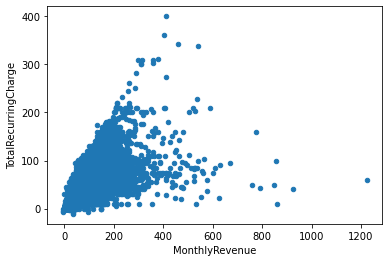

In [3]:
data[['MonthlyRevenue','TotalRecurringCharge']].plot('MonthlyRevenue','TotalRecurringCharge',kind='scatter')

<AxesSubplot:>

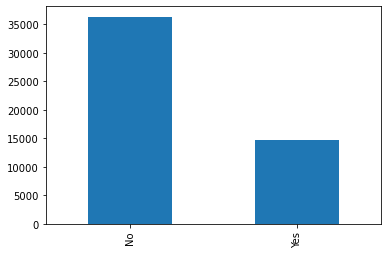

In [4]:
data['Churn'].value_counts().plot(kind='bar')

<AxesSubplot:>

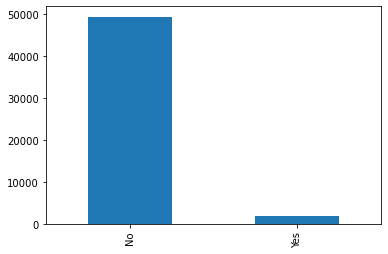

In [5]:
data['MadeCallToRetentionTeam'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Density'>

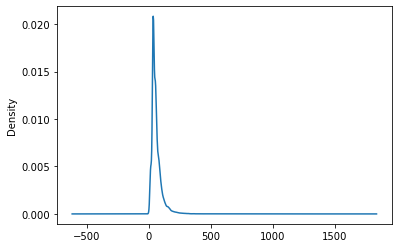

In [6]:
data['MonthlyRevenue'].plot(kind='kde')

<AxesSubplot:>

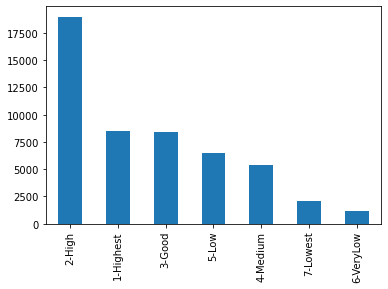

In [7]:
data['CreditRating'].value_counts().plot(kind='bar')

<AxesSubplot:>

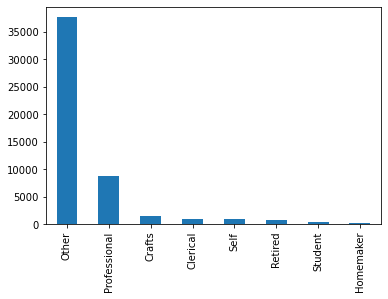

In [8]:
data['Occupation'].value_counts().plot(kind='bar')

In [9]:
customer_id=data.iloc[:,0]
data.drop('CustomerID',axis=1,inplace=True)

In [10]:
data.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


<AxesSubplot:>

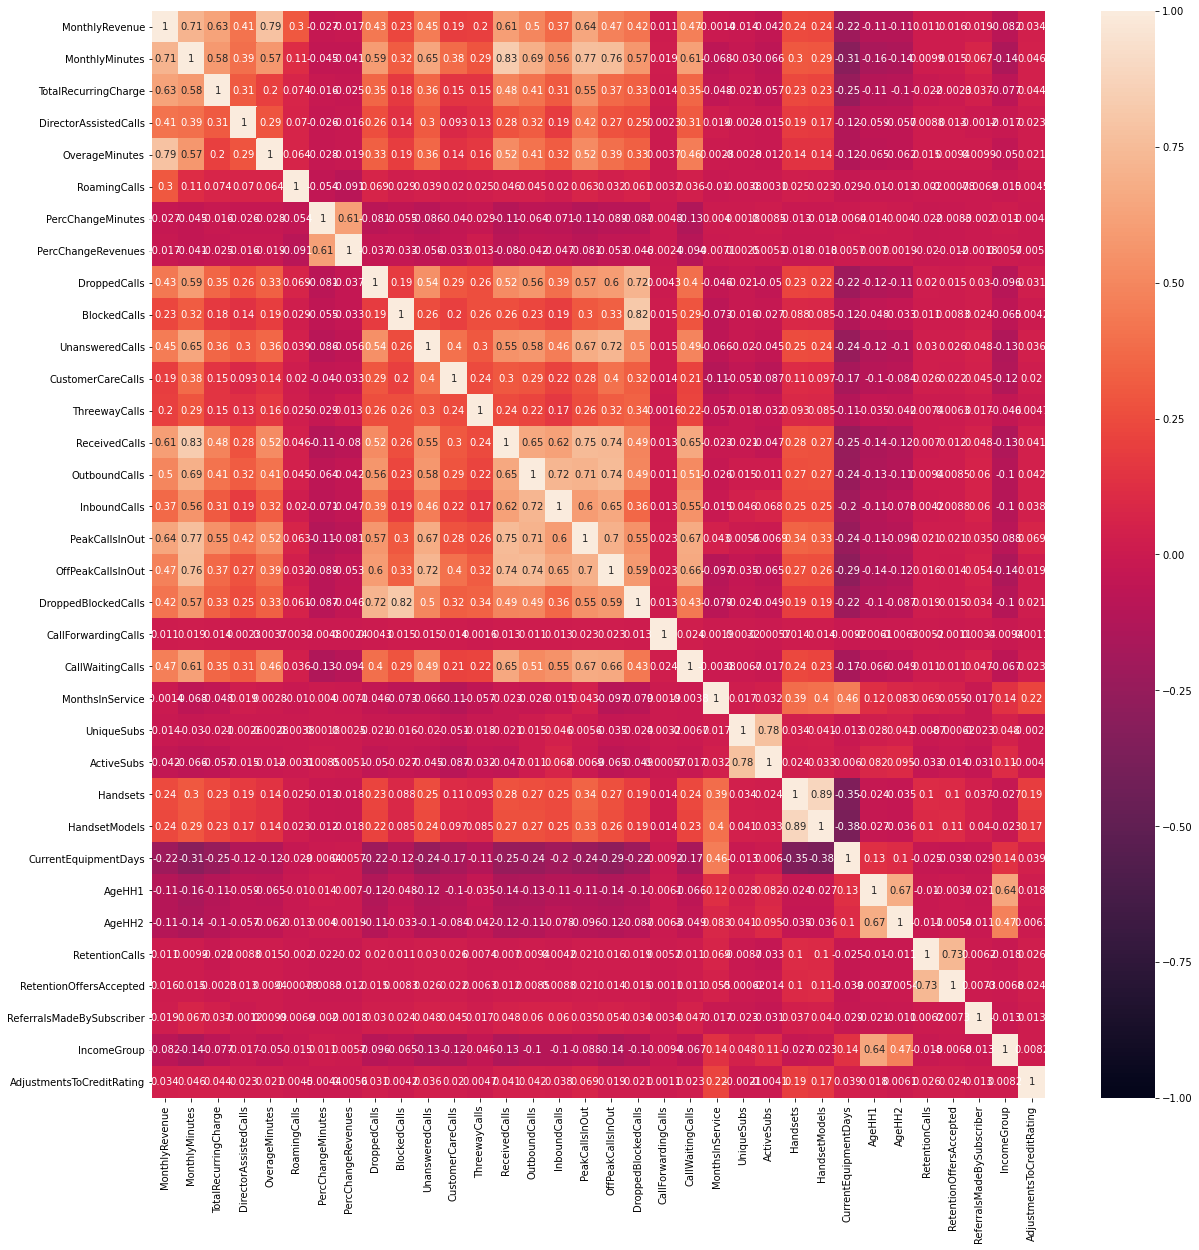

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)

In [12]:
data.shape

(51047, 57)

In [13]:
data.isnull().sum()

Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1                       909
AgeHH2    

In [14]:
(data.isnull().sum().sum()/data.shape[0])*100

6.885811115246733

In [15]:
data.dropna(inplace=True)

In [16]:
data.shape

(49752, 57)

In [17]:
data['Churn']

0        Yes
1        Yes
2         No
3         No
4        Yes
        ... 
51035     No
51037     No
51040     No
51041    Yes
51043     No
Name: Churn, Length: 49752, dtype: object

In [18]:
data['Churn']=data['Churn'].map({'Yes':1,'No':0})

In [19]:
data

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51035,0,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,5.7,...,0,4,No,0,Unknown,No,2-High,Other,Professional,No
51037,0,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,...,0,3,No,0,Unknown,No,3-Good,Other,Other,Yes
51040,0,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,...,0,7,No,0,Unknown,No,1-Highest,Other,Professional,Unknown
51041,1,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,...,0,2,No,0,30,No,5-Low,Other,Professional,Yes


In [20]:
(data=='Unknown').sum()

Churn                            0
MonthlyRevenue                   0
MonthlyMinutes                   0
TotalRecurringCharge             0
DirectorAssistedCalls            0
OverageMinutes                   0
RoamingCalls                     0
PercChangeMinutes                0
PercChangeRevenues               0
DroppedCalls                     0
BlockedCalls                     0
UnansweredCalls                  0
CustomerCareCalls                0
ThreewayCalls                    0
ReceivedCalls                    0
OutboundCalls                    0
InboundCalls                     0
PeakCallsInOut                   0
OffPeakCallsInOut                0
DroppedBlockedCalls              0
CallForwardingCalls              0
CallWaitingCalls                 0
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                       0
ServiceArea                      0
Handsets                         0
HandsetModels                    0
CurrentEquipmentDays

In [21]:
data['HandsetPrice'].value_counts()             

Unknown    28263
30          7147
150         4024
130         2043
80          1901
10          1869
60          1730
200         1227
100         1209
40           240
400           45
250           20
300           12
180            9
500            7
240            6
Name: HandsetPrice, dtype: int64

In [22]:
data['HandsetPrice'][data['HandsetPrice']=='Unknown']=0

<ipython-input-22-6cb36c14dc09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HandsetPrice'][data['HandsetPrice']=='Unknown']=0


In [23]:
data['HandsetPrice']=data['HandsetPrice'].astype('int')

In [24]:
data['Homeownership'].value_counts()

Known      33725
Unknown    16027
Name: Homeownership, dtype: int64

In [25]:
data['MaritalStatus'].value_counts() 

Unknown    18649
Yes        18506
No         12597
Name: MaritalStatus, dtype: int64

In [26]:
for i in data.columns:
    print(i)

Churn
MonthlyRevenue
MonthlyMinutes
TotalRecurringCharge
DirectorAssistedCalls
OverageMinutes
RoamingCalls
PercChangeMinutes
PercChangeRevenues
DroppedCalls
BlockedCalls
UnansweredCalls
CustomerCareCalls
ThreewayCalls
ReceivedCalls
OutboundCalls
InboundCalls
PeakCallsInOut
OffPeakCallsInOut
DroppedBlockedCalls
CallForwardingCalls
CallWaitingCalls
MonthsInService
UniqueSubs
ActiveSubs
ServiceArea
Handsets
HandsetModels
CurrentEquipmentDays
AgeHH1
AgeHH2
ChildrenInHH
HandsetRefurbished
HandsetWebCapable
TruckOwner
RVOwner
Homeownership
BuysViaMailOrder
RespondsToMailOffers
OptOutMailings
NonUSTravel
OwnsComputer
HasCreditCard
RetentionCalls
RetentionOffersAccepted
NewCellphoneUser
NotNewCellphoneUser
ReferralsMadeBySubscriber
IncomeGroup
OwnsMotorcycle
AdjustmentsToCreditRating
HandsetPrice
MadeCallToRetentionTeam
CreditRating
PrizmCode
Occupation
MaritalStatus


In [27]:
cat_columns=[i for i in data.columns if i not in data.describe().columns]
cat_columns

['ServiceArea',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus']

In [28]:
cat_data=data[cat_columns]

In [29]:
data.drop('ServiceArea',inplace=True,axis=1)

In [30]:
cat_columns=[i for i in data.columns if i not in data.describe().columns]
cat_data=data[cat_columns]
cat_columns

['ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus']

In [31]:
for i in cat_columns:
    print(data[i].value_counts())

No     37483
Yes    12269
Name: ChildrenInHH, dtype: int64
No     42852
Yes     6900
Name: HandsetRefurbished, dtype: int64
Yes    44905
No      4847
Name: HandsetWebCapable, dtype: int64
No     40280
Yes     9472
Name: TruckOwner, dtype: int64
No     45619
Yes     4133
Name: RVOwner, dtype: int64
Known      33725
Unknown    16027
Name: Homeownership, dtype: int64
No     31432
Yes    18320
Name: BuysViaMailOrder, dtype: int64
No     30667
Yes    19085
Name: RespondsToMailOffers, dtype: int64
No     49006
Yes      746
Name: OptOutMailings, dtype: int64
No     46896
Yes     2856
Name: NonUSTravel, dtype: int64
No     40368
Yes     9384
Name: OwnsComputer, dtype: int64
Yes    34241
No     15511
Name: HasCreditCard, dtype: int64
No     40141
Yes     9611
Name: NewCellphoneUser, dtype: int64
No     42877
Yes     6875
Name: NotNewCellphoneUser, dtype: int64
No     49078
Yes      674
Name: OwnsMotorcycle, dtype: int64
No     48131
Yes     1621
Name: MadeCallToRetentionTeam, dtype: int64
2-Hig

In [32]:
data.drop(['MadeCallToRetentionTeam','PrizmCode','OwnsMotorcycle','CreditRating'],axis=1,inplace=True)

In [33]:
cat_columns=[i for i in data.columns if i not in data.describe().columns]
cat_data=data[cat_columns]
cat_columns

['ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'Occupation',
 'MaritalStatus']

In [34]:
for i in cat_columns:
    print(i,data[i].unique(),'\n')

ChildrenInHH ['No' 'Yes'] 

HandsetRefurbished ['No' 'Yes'] 

HandsetWebCapable ['Yes' 'No'] 

TruckOwner ['No' 'Yes'] 

RVOwner ['No' 'Yes'] 

Homeownership ['Known' 'Unknown'] 

BuysViaMailOrder ['Yes' 'No'] 

RespondsToMailOffers ['Yes' 'No'] 

OptOutMailings ['No' 'Yes'] 

NonUSTravel ['No' 'Yes'] 

OwnsComputer ['Yes' 'No'] 

HasCreditCard ['Yes' 'No'] 

NewCellphoneUser ['No' 'Yes'] 

NotNewCellphoneUser ['No' 'Yes'] 

Occupation ['Professional' 'Crafts' 'Other' 'Self' 'Retired' 'Homemaker' 'Clerical'
 'Student'] 

MaritalStatus ['No' 'Yes' 'Unknown'] 



In [35]:
new_data=pd.get_dummies(data,drop_first=True)
new_data.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,NotNewCellphoneUser_Yes,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_Unknown,MaritalStatus_Yes
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,0,0,0,1,0,0,0,0,0
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,0,0,0,1,0,0,0,0,1
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,0,0,1,0,0,0,0,0,0
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,1,0,0,0,1,0,0,0,0,1


In [36]:
x=new_data.drop('Churn',axis=1)
y=new_data[['Churn']]

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=7,test_size=0.2)

In [37]:
x_train.shape

(39801, 58)

In [38]:
x_test.shape

(9951, 58)

In [39]:
xg=XGBClassifier()
xg.fit(x_train,y_train)
print('The Train Score',xg.score(x_train,y_train))
print('The Test Score',xg.score(x_test,y_test))

C:\Users\ragul\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ragul\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[23:38:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Train Score 0.8195020225622471
The Test Score 0.7165109034267912
